In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('labelled_data.csv')

In [3]:
df.head(5)

,Unnamed: 0,id,submitter,authors,title,comments,journal-ref,doi,report-no,categories,license,abstract,versions,update_date,authors_parsed
0,0,0704.0062,Tom\'a\v{s} Vina\v{r},"Rastislav \v{S}r\'amek, Bro\v{n}a Brejov\'a, T...",On-line Viterbi Algorithm and Its Relationship...,NaN,Algorithms in Bioinformatics: 7th Internationa...,10.1007/978-3-540-74126-8_23,NaN,cs.DS,NaN,"In this paper, we introduce the on-line Vite...","[{'version': 'v1', 'created': 'Sat, 31 Mar 200...",2010-01-25,"[['Šrámek', 'Rastislav', ''], ['Brejová', 'Bro..."
1,1,0704.0492,Shenghui Su,"Shenghui Su, and Shuwang Lu",Refuting the Pseudo Attack on the REESSE1+ Cry...,"14 pages, and 2 table",NaN,NaN,NaN,cs.CR,http://arxiv.org/licenses/nonexclusive-distrib...,We illustrate through example 1 and 2 that t...,"[{'version': 'v1', 'created': 'Wed, 4 Apr 2007...",2010-02-04,"[['Su', 'Shenghui', ''], ['Lu', 'Shuwang', '']]"
2,2,0704.0834,Anatoly Rodionov,"Anatoly Rodionov, Sergey Volkov",P-adic arithmetic coding,29 pages,NaN,NaN,NaN,cs.DS,NaN,A new incremental algorithm for data compres...,"[{'version': 'v1', 'created': 'Fri, 6 Apr 2007...",2007-05-23,"[['Rodionov', 'Anatoly', ''], ['Volkov', 'Serg..."
3,3,0704.0858,Mohamed Kaaniche,"Eric Alata (LAAS), Vincent Nicomette (LAAS), M...",Lessons Learned from the deployment of a high-...,NaN,Proc. 6th European Dependable Computing Confer...,NaN,NaN,cs.CR,NaN,This paper presents an experimental study an...,"[{'version': 'v1', 'created': 'Fri, 6 Apr 2007...",2016-08-14,"[['Alata', 'Eric', '', 'LAAS'], ['Nicomette', ..."
4,4,0704.1394,Tarik Had\v{z}i\'c,"Tarik Hadzic, Rune Moller Jensen, Henrik Reif ...",Calculating Valid Domains for BDD-Based Intera...,NaN,NaN,NaN,NaN,cs.AI,NaN,In these notes we formally describe the func...,"[{'version': 'v1', 'created': 'Wed, 11 Apr 200...",2007-05-23,"[['Hadzic', 'Tarik', ''], ['Jensen', 'Rune Mol..."


In [4]:
df_cols = df[['title', 'abstract', 'categories']]

In [5]:
df_cols.shape

(39472, 3)

In [6]:
df_cols.head(5)

,title,abstract,categories
0,On-line Viterbi Algorithm and Its Relationship...,"In this paper, we introduce the on-line Vite...",cs.DS
1,Refuting the Pseudo Attack on the REESSE1+ Cry...,We illustrate through example 1 and 2 that t...,cs.CR
2,P-adic arithmetic coding,A new incremental algorithm for data compres...,cs.DS
3,Lessons Learned from the deployment of a high-...,This paper presents an experimental study an...,cs.CR
4,Calculating Valid Domains for BDD-Based Intera...,In these notes we formally describe the func...,cs.AI


In [7]:
df_final = df_cols

In [8]:
import nltk
nltk.download('wordnet', 'punkt')

[nltk_data] Downloading package wordnet to punkt...
[nltk_data]   Package wordnet is already up-to-date!


True

In [9]:
from re import sub, findall, I, MULTILINE
from nltk.tokenize import sent_tokenize

filter_chars = {'¥', '©', '¬', '®', '°', '±', '¼', 'Á', 'Å', 'Æ', 'Ç', 'É', 'Ñ', 'Ó', 'Ö', '×', 'ß', 'à', 'á', 'â', 'ã',
                'ä', 'å', 'æ', 'ç', 'è', 'é', 'ê', 'ë', 'í',
                'î', 'ï', 'ñ', 'ò', 'ó', 'ô', 'õ', 'ö', 'ø', 'ú', 'ü', 'ý', 'ā', 'ą', 'ć', 'Č', 'č', 'ē', 'ĕ', 'ė', 'ě',
                'ğ', 'ħ', 'ı', 'ĺ', 'Ł', 'ł', 'ń', 'ņ',
                'ň', 'ō', 'Ř', 'І', 'В', 'С', 'ř', 'ś', 'Ş', 'ş', 'Š', 'š', 'ť', 'ū', 'ŭ', 'ů', 'ų', 'Ż', 'Ž', 'ž', 'ǧ',
                'ǫ', 'ș', 'ə', 'ˆ', 'ˇ', '˙', '˜', '́', '̂', '̃', '̄',
                '̈', 'Γ', 'Δ', 'Θ', 'Λ', 'Π', 'Σ', 'Φ', 'Χ', 'Ψ', 'Ω', 'α', 'β', 'γ', 'δ', 'ε', 'ζ', 'η', 'θ', 'κ', 'λ',
                'μ', 'ν', 'ξ', 'π', 'ρ', 'σ', 'τ', 'υ',
                'φ', 'χ', 'ψ', 'ω', 'ϑ', 'ϕ', 'ϱ', 'ϵ', 'ḯ', '‖', '†', '…', '‰', '′', '″', '€', '⃖', '⃗', 'ℓ', 'ℜ', '™',
                '←', '↑', '→', '↓', '↦', '⇀', '⇒', '⇔',
                '⇢', '∀', '∂', '∃', '∅', '∆', '∇', '∈', '∉', '∏', '∑', '∘', '∙', '∝', '∞', '∠', '∣', '∥', '∧', '∨', '∩',
                '∪', '∫', '∭', '∼', '≃', '≅', '≈', '≔', '≜',
                '≠', '≡', '≤', '≥', '≪', '≫', '≲', '≳', '⊂', '⊆', '⊕', '⊖', '⊗', '⊙', '⋀', '⋁', '⋂', '⋃', '⋅', '⋆', '⋒',
                '⋮', '⋯', '⌊', '⌋', '□', '△', '▽', '♯',
                '✔', '➔', '⟶', '⟹', '⩽', '⩾', '⪰', '〈', '〉', '丙', '东', '作', '六', '务', '印', '厂', '合', '塘', '大',
                '子', '宁', '宅', '宝', '宫', '尚', '局',
                '峰', '府', '建', '承', '汪', '浦', '船', '药', '路', '辰', '铜', '食', '︷', '︸', '＋', '−', '{', '}',
                'ˆ', ':', '[', ']', '+', '=', '*', '<', '>', '^', '/', '-', '–', '&', '#'}


def preprocessed_text(txt: str, keep_parenthesis=False) -> str:
    # Remove links, if any
    txt = sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*', '', txt, flags=MULTILINE)

    # Remove references, if any
    txt = sub(r'\s\([A-Z][a-z]+,\s[A-Z][a-z]?\.[^\)]*,\s\d{4}\)', '', txt)

    # Replace multiple spaces with a single space
    txt = sub(r' +', ' ', txt, flags=I)

    # '. singlelowercasechar' -> '.singlelowercasechar'
    txt = sub(r'(?<=[\.])\s+(?=(?:[a-z|[0-9]))', '', txt)

    # Converting patterns: ab.a -> ab a,   b.1 -> b 1,   A.F -> A F,   word.something -> word something
    for pattern in findall(r'[a-zA-Z]\.[a-zA-Z0-9]', txt):
        txt = txt.replace(pattern, f"{pattern.split('.')[0]} {pattern.split('.')[1]}")

    if not keep_parenthesis:
        # Removing parenthesis
        final_txt = sub(r'\(.*?\)', ' ', txt)
        
        punctuation = "\"#$&\'()-/:;@[\\]_`~'“”´ʼ‘’{|}+*^=><−"

    else:
        # Removing parenthesis with no alpha numeric character except (abcijkmnpqrtxy)
        final_txt = sub(r'\(([0-9+-/*^><=&$#@%.,!{} abcijkmnpqrtxyABCIJKMNPQRTXY]*)\)', ' ', txt)
        
        punctuation = "\"#$&\'-/:;@\\_`~'“”´ʼ‘’{|}[]+*^=><−"

    # Removes punctuation
    final_txt = ''.join([c if c not in punctuation and c not in filter_chars else ' ' for c in final_txt])
    
    # Removing extra spaces
    final_txt = sub(r' +', ' ', final_txt, flags=I)

    return final_txt

In [10]:
# removing any character other than alphabets from the starting of a word

df_final['tidy_title'] = df_final['title'].str.replace('[^a-zA-Z]'," ", regex=True)

# converting the text to lowercase
df_final['tidy_title'] = df_final['tidy_title'].str.lower()

# running the code for necessary pre processing
df_final['tidy_title'] = np.vectorize(preprocessed_text)(df_final['tidy_title'])

/var/folders/3p/m4ddxh8d6ddgsr3nzqj7z7w00000gn/T/ipykernel_23864/2706464013.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['tidy_title'] = df_final['title'].str.replace('[^a-zA-Z]'," ", regex=True)
/var/folders/3p/m4ddxh8d6ddgsr3nzqj7z7w00000gn/T/ipykernel_23864/2706464013.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['tidy_title'] = df_final['tidy_title'].str.lower()
/var/folders/3p/m4ddxh8d6ddgsr3nzqj7z7w00000gn/T/ipykernel_23864/2706464013.py:9: SettingWithCopyWarning: 
A val

In [11]:
# removing any character other than alphabets from the starting of a word

df_final['tidy_abstract'] = df_final['abstract'].str.replace('[^a-zA-Z]'," ", regex=True)

# converting the text to lowercase
df_final['tidy_abstract'] = df_final['tidy_abstract'].str.lower()

# running the code for necessary pre processing
df_final['tidy_abstract'] = np.vectorize(preprocessed_text)(df_final['tidy_abstract'])

/var/folders/3p/m4ddxh8d6ddgsr3nzqj7z7w00000gn/T/ipykernel_23864/1425389209.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['tidy_abstract'] = df_final['abstract'].str.replace('[^a-zA-Z]'," ", regex=True)
/var/folders/3p/m4ddxh8d6ddgsr3nzqj7z7w00000gn/T/ipykernel_23864/1425389209.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['tidy_abstract'] = df_final['tidy_abstract'].str.lower()
/var/folders/3p/m4ddxh8d6ddgsr3nzqj7z7w00000gn/T/ipykernel_23864/1425389209.py:9: SettingWithCopyWar

In [12]:
df_final.head()

,title,abstract,categories,tidy_title,tidy_abstract
0,On-line Viterbi Algorithm and Its Relationship...,"In this paper, we introduce the on-line Vite...",cs.DS,on line viterbi algorithm and its relationship...,in this paper we introduce the on line viterb...
1,Refuting the Pseudo Attack on the REESSE1+ Cry...,We illustrate through example 1 and 2 that t...,cs.CR,refuting the pseudo attack on the reesse crypt...,we illustrate through example and that the co...
2,P-adic arithmetic coding,A new incremental algorithm for data compres...,cs.DS,p adic arithmetic coding,a new incremental algorithm for data compress...
3,Lessons Learned from the deployment of a high-...,This paper presents an experimental study an...,cs.CR,lessons learned from the deployment of a high ...,this paper presents an experimental study and...
4,Calculating Valid Domains for BDD-Based Intera...,In these notes we formally describe the func...,cs.AI,calculating valid domains for bdd based intera...,in these notes we formally describe the funct...


In [13]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

# Peforming Lemmatization on title
from nltk.stem import WordNetLemmatizer

tokenized_title = df_final['tidy_title'].apply(lambda x: x.split())
  
lemmatizer = WordNetLemmatizer()
tokenized_title = tokenized_title.apply(lambda x:[lemmatizer.lemmatize(i) for i in x])

for i in range(len(tokenized_title)):
    tokenized_title[i] = " ".join(tokenized_title[i])
    
df_final['tidy_title'] = tokenized_title

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/jaskaransingh/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/jaskaransingh/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
/var/folders/3p/m4ddxh8d6ddgsr3nzqj7z7w00000gn/T/ipykernel_23864/998363637.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['tidy_title'] = tokenized_title


In [14]:
df_final.head(5)

,title,abstract,categories,tidy_title,tidy_abstract
0,On-line Viterbi Algorithm and Its Relationship...,"In this paper, we introduce the on-line Vite...",cs.DS,on line viterbi algorithm and it relationship ...,in this paper we introduce the on line viterb...
1,Refuting the Pseudo Attack on the REESSE1+ Cry...,We illustrate through example 1 and 2 that t...,cs.CR,refuting the pseudo attack on the reesse crypt...,we illustrate through example and that the co...
2,P-adic arithmetic coding,A new incremental algorithm for data compres...,cs.DS,p adic arithmetic coding,a new incremental algorithm for data compress...
3,Lessons Learned from the deployment of a high-...,This paper presents an experimental study an...,cs.CR,lesson learned from the deployment of a high i...,this paper presents an experimental study and...
4,Calculating Valid Domains for BDD-Based Intera...,In these notes we formally describe the func...,cs.AI,calculating valid domain for bdd based interac...,in these notes we formally describe the funct...


In [15]:
tokenized_abstract = df_final['tidy_abstract'].apply(lambda x: x.split())
  
lemmatizer = WordNetLemmatizer()
tokenized_abstract = tokenized_abstract.apply(lambda x:[lemmatizer.lemmatize(i) for i in x])

for i in range(len(tokenized_abstract)):
    tokenized_abstract[i] = " ".join(tokenized_abstract[i])
    
df_final['tidy_abstract'] = tokenized_abstract

/var/folders/3p/m4ddxh8d6ddgsr3nzqj7z7w00000gn/T/ipykernel_23864/4047536775.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['tidy_abstract'] = tokenized_abstract


In [16]:
df_final.head()

,title,abstract,categories,tidy_title,tidy_abstract
0,On-line Viterbi Algorithm and Its Relationship...,"In this paper, we introduce the on-line Vite...",cs.DS,on line viterbi algorithm and it relationship ...,in this paper we introduce the on line viterbi...
1,Refuting the Pseudo Attack on the REESSE1+ Cry...,We illustrate through example 1 and 2 that t...,cs.CR,refuting the pseudo attack on the reesse crypt...,we illustrate through example and that the con...
2,P-adic arithmetic coding,A new incremental algorithm for data compres...,cs.DS,p adic arithmetic coding,a new incremental algorithm for data compressi...
3,Lessons Learned from the deployment of a high-...,This paper presents an experimental study an...,cs.CR,lesson learned from the deployment of a high i...,this paper present an experimental study and t...
4,Calculating Valid Domains for BDD-Based Intera...,In these notes we formally describe the func...,cs.AI,calculating valid domain for bdd based interac...,in these note we formally describe the functio...


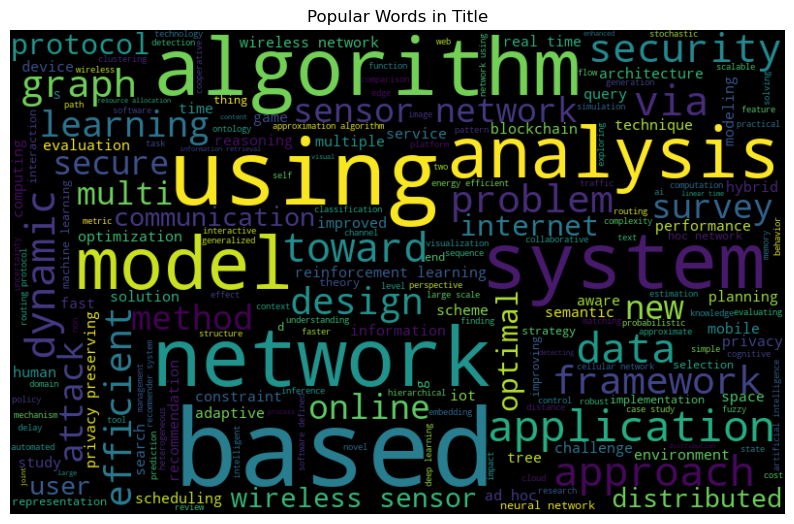

In [17]:
from wordcloud import WordCloud

all_words = ' '.join([text for text in df_final['tidy_title']])  
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.title("Popular Words in Title")
plt.axis('off') 
plt.show()

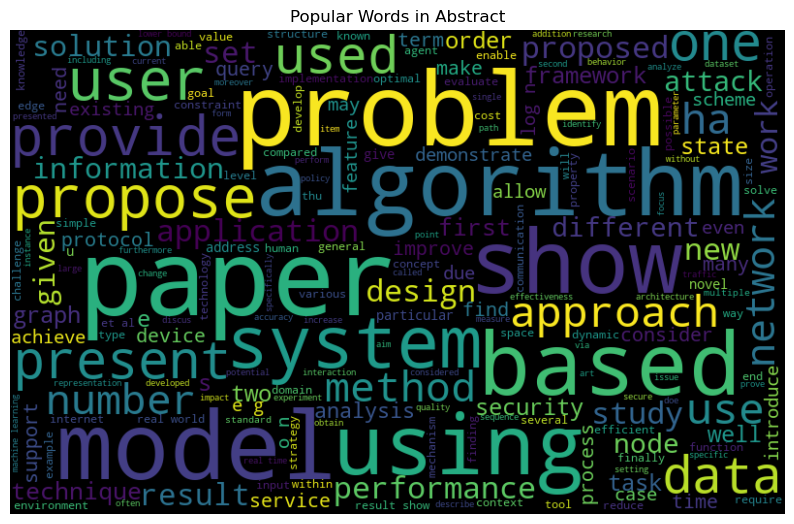

In [18]:
all_words = ' '.join([text for text in df_final['tidy_abstract']])  
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words) 
plt.figure(figsize=(10, 7)) 
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Popular Words in Abstract")
plt.axis('off') 
plt.show()

In [19]:
df_final['title'] = df_final['tidy_title']
df_final['abstract'] = df_final['tidy_abstract']

/var/folders/3p/m4ddxh8d6ddgsr3nzqj7z7w00000gn/T/ipykernel_23864/1983769571.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['title'] = df_final['tidy_title']
/var/folders/3p/m4ddxh8d6ddgsr3nzqj7z7w00000gn/T/ipykernel_23864/1983769571.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['abstract'] = df_final['tidy_abstract']


In [20]:
df_final.drop('tidy_title', axis=1, inplace=True)

/var/folders/3p/m4ddxh8d6ddgsr3nzqj7z7w00000gn/T/ipykernel_23864/2145669434.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final.drop('tidy_title', axis=1, inplace=True)


In [21]:
df_final.drop('tidy_abstract', axis=1, inplace=True)

/var/folders/3p/m4ddxh8d6ddgsr3nzqj7z7w00000gn/T/ipykernel_23864/2894192234.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final.drop('tidy_abstract', axis=1, inplace=True)


In [22]:
df_final.head(5)

,title,abstract,categories
0,on line viterbi algorithm and it relationship ...,in this paper we introduce the on line viterbi...,cs.DS
1,refuting the pseudo attack on the reesse crypt...,we illustrate through example and that the con...,cs.CR
2,p adic arithmetic coding,a new incremental algorithm for data compressi...,cs.DS
3,lesson learned from the deployment of a high i...,this paper present an experimental study and t...,cs.CR
4,calculating valid domain for bdd based interac...,in these note we formally describe the functio...,cs.AI


In [37]:
df_final['categories'].value_counts()

cs.CR    8814
cs.NI    8811
cs.AI    8005
cs.DS    7116
cs.HC    3645
cs.IR    2818
cs.OS     263
Name: categories, dtype: int64

<AxesSubplot:xlabel='categories', ylabel='count'>

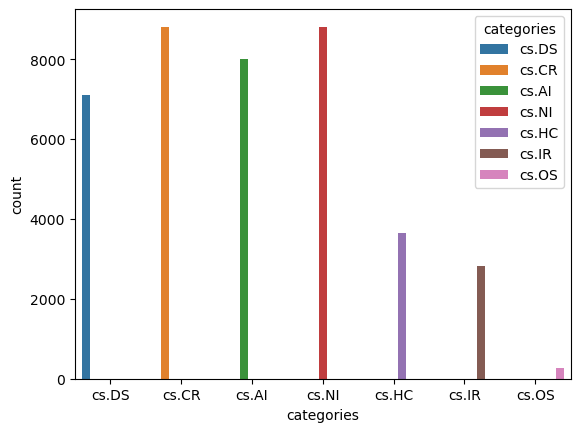

In [36]:
import seaborn as sns

sns.countplot(data=df_final, x='categories', hue='categories')

In [35]:
from sklearn.feature_extraction.text import CountVectorizer

In [39]:
bow_vector = CountVectorizer(stop_words='english')
bow = bow_vector.fit_transform(df_final['abstract'])
print(bow.shape)

(39472, 53733)


In [48]:
from sklearn.model_selection import train_test_split

X_labelled, X_unlabelled, y_label, y_unlabelled = train_test_split(bow, df_final['categories'], train_size = 0.20, stratify=df['categories'], random_state=42)

In [49]:
X_labelled.shape

(7894, 53733)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_labelled, y_label, train_size = 0.80, random_state=42)

In [61]:
from sklearn.svm import SVC

svc = SVC(probability=True)
svc.fit(X_train, y_train)

pred = svc.predict(X_test)

print(accuracy_score(y_test, pred))

0.8613046231792274


In [60]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

pred = rfc.predict(X_test)

print(accuracy_score(y_test, pred))

0.8429385687143762


In [65]:
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression(solver='lbfgs', max_iter=1000)

lg.fit(X_train,y_train)
pred = lg.predict(X_test)

print(accuracy_score(y_test, pred))

0.8708043065231159


In [66]:
abstract = [
    "We present a new approximation algorithm for the (metric) prize-collecting traveling salesperson problem (PCTSP). In PCTSP, opposed to the classical traveling salesperson problem (TSP), one may not include a vertex of the input graph in the returned tour at the cost of a given vertex-dependent penalty, and the objective is to balance the length of the tour and the incurred penalties for omitted vertices by minimizing the sum of the two. We present an algorithm that achieves an approximation guarantee of 1.774 with respect to the natural linear programming relaxation of the problem. This significantly reduces the gap between the approximability of classical TSP and PCTSP, beating the previously best known approximation factor of 1.915. As a key ingredient of our improvement, we present a refined decomposition technique for solutions of the LP relaxation, and show how to leverage components of that decomposition as building blocks for our tours."
]

In [68]:
vect = bow_vector.transform(abstract).toarray()
my_prediction = lg.predict(vect)
print(my_prediction)

['cs.DS']
